# Lecture 17: Kernel Methods

COMP 3921F \
Applied Machine Learning \
Mon 4:40 PM - 5:55 PM \
Tue: 5:00 PM - 6:15 PM

Professor: __Ramesh Natarajan__ \
Email: **ramesh.natarajan@yu.edu** \
Department of Computer Science \
Stern College and Yeshiva University

Date: Mar xx, 2024



## Acknowledgements

1. The starting point for developing the notebook-based instruction material was the set of notebooks provided by the previous  course instructor__[Prof. Zach Glassman](https://www.linkedin.com/in/zachary-glassman-7088844b/)__.
2. These notebooks have been augmented by similar instruction material taken from many, many other sources, including official documentation from many ML libraries and frameworks. I have adapted and modified the content where needed to make it compatible with student level, orientation and proficiency in this course.
3. The primary addition sources include:
   1. Course content from V. Kuleshov, Cornell Tech __[repo](https://github.com/kuleshov/cornell-cs5785-2020-applied-ml/blob/main/notebooks/lecture1-introduction.ipynb)__.
   2. Book and support material from Hal Daume II, __[A course in Machine Learning](http://ciml.info)__. __[repo](https://github.com/hal3/ciml/)__
   3. Book and support material from A. Geron, __[Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow (3rd edition)](https://homl.info/er3)__. __[repo](https://github.com/ageron/handson-ml3/blob/main/README.md)__




# Announcements

1. Problem Set 4 still open for submission.
2. Recitation will review Kernel  Methods
3. You should continue  to review and refresh yourself on the mathematical prerequisites for applied machine learning from part 1 for Deisenroth, Faisal and Ong, __[Mathematics for Machine Learning](https://mml-book.github.io/book/mml-book.pdf)__.



# Kernel Methods 

<table>
    <td width="40%"><center>
        <img src="./img/Lecture-17/KernelMethods.png" /> 
    </center>
    Generated by Chat-GPT 
     </td>  
    <td>
Kernel methods in machine learning enable algorithms to operate in a high-dimensional space without explicitly computing the coordinates of the data in that space, thus efficiently handling non-linear relationships. 
</td></table> 
They work by using kernel functions to implicitly map data to a higher-dimensional feature space where linear classification or regression techniques can be applied successfully. This approach, known as the "kernel trick," is widely used in various algorithms, including Support Vector Machines (SVMs) and Principal Component Analysis (PCA).

 Kernel methods enhance the flexibility and power of machine learning models, allowing them to uncover complex patterns and make accurate predictions from intricate data structures.

# Kernels and SVM

We want to understand support vector machines and kernel (in particular the "kernel trick").  

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)

In [4]:
from sklearn.svm import SVC
model = SVC()
# now i can fit as normal

Lets review the concept of separating hyperplanes in a 2 class separable classification problem. 

There are an infinite number of separating hyperplanes.  How do we pick the optimal separating hyperplane for our proposed decision boundary

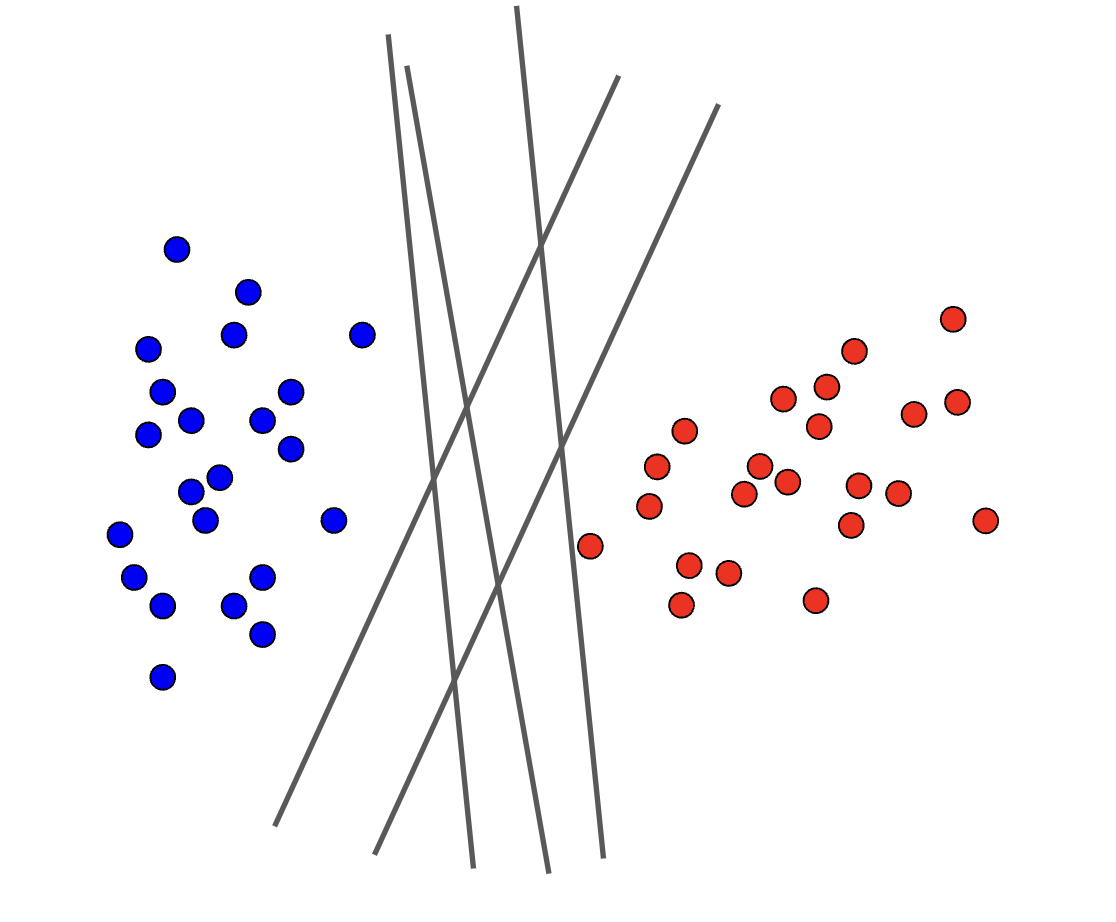

In [4]:
Image(filename="./img/Lecture-17/hyperplanes.png", width=400)

### Margin

Remember the margin $\gamma$ for a linear model $X\beta$ and a dataset $D$ as
$$ \gamma(D, \beta) \text{margin}(D, \beta) = \begin{cases}
\min_{(x, y) \in D} y(x\cdot\beta) &\mbox {if $\beta$ separates $D$} \\
-\infty& \mbox{otherwise}
\end{cases}
$$

The optimal hyperplane parameters corresponding to the maximum margin are given by 


$$ \beta_{\text{opt}} = \arg\max_{\beta}\gamma(D, \beta)$$

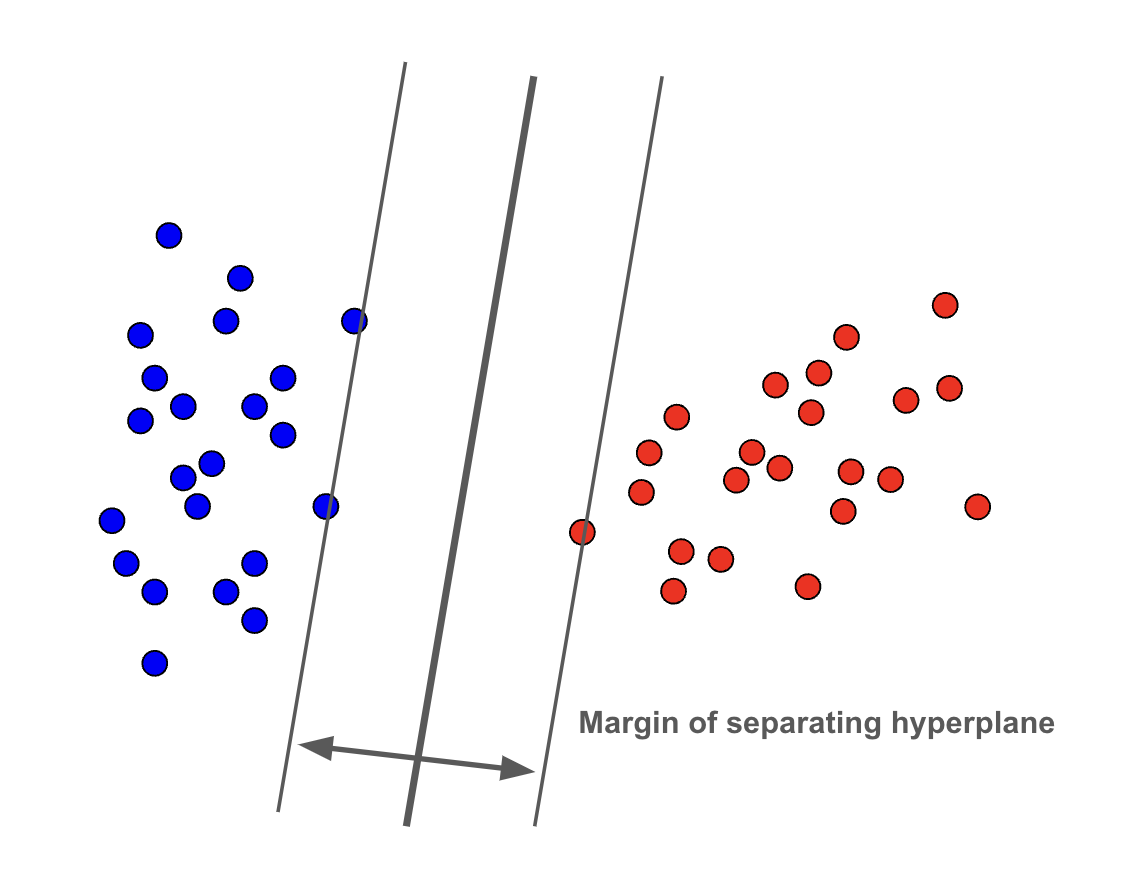

In [5]:
Image(filename="./img/Lecture-17/margin.png", width=500)

# Maximum Margin Classifier

The support vector machine is a way to find this hyperplane by setting up the following problem

$$\min_{\beta} \frac{1}{\gamma(\beta)}$$

subject to $y_n(x_n\cdot\beta) \geq 1$.

Basically, find the parameters which maximize the margin with the restriction that all examples are correctly classified.

This is *hard-margin SVM* because it requires the data is linearly separable.

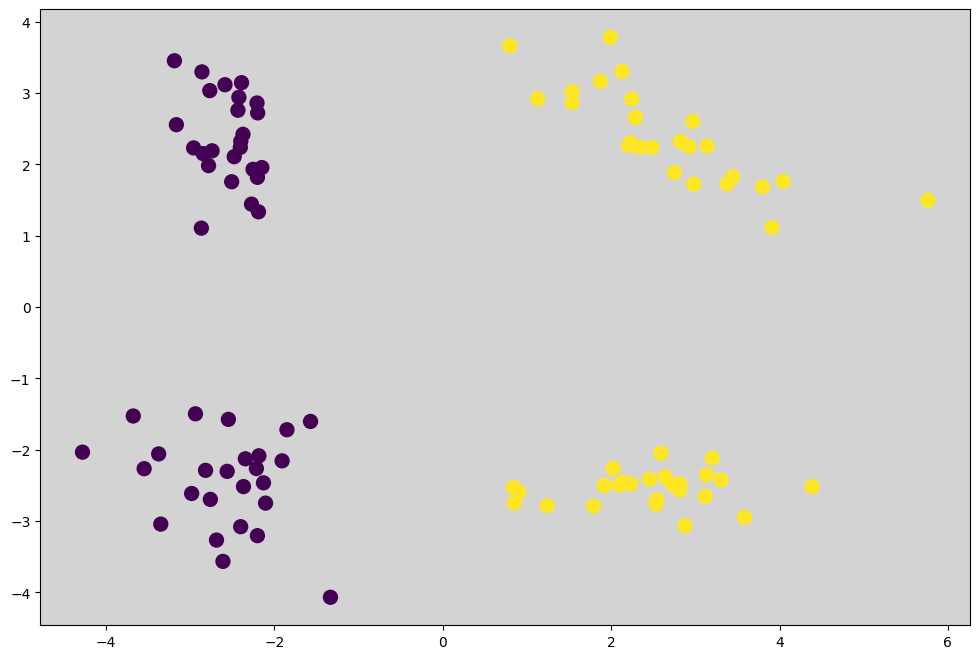

In [16]:
from sklearn.datasets import make_classification
np.random.seed(10)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, class_sep=2.5)
plt.axes().set_facecolor("lightgray")
plt.scatter(X[:, 0], X[:, 1],s = 100, c=y)

plt.show()

In [6]:
svm = SVC(kernel='linear').fit(X, y)

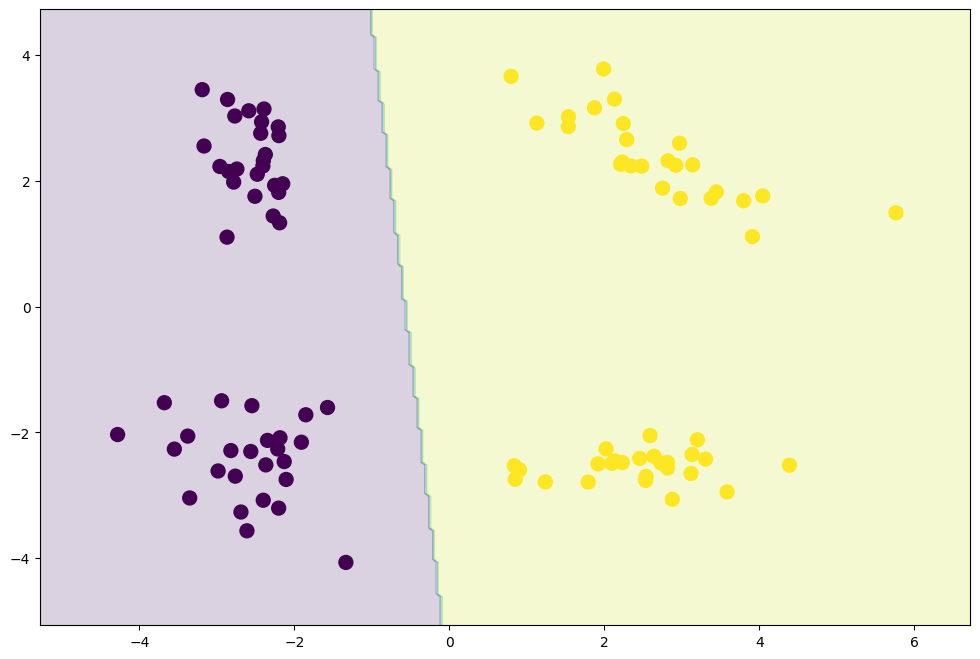

In [7]:
def plot_decision(X, y, svm):
    xx, yy = np.meshgrid(
        np.arange(X[:, 0].min()-1, X[:, 0].max()+1, .05), 
        np.arange(X[:, 1].min()-1, X[:, 1].max()+1, .05)
    )
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.contourf(xx, yy, Z.reshape(xx.shape), alpha=.2)
    plt.scatter(X[:, 0], X[:, 1], s=100, c=y)
plot_decision(X, y, svm)

## Non-separable Classification

We now consider the case when the two classes are NOT linearly separable, so that it is inevitable that some of the examples will be incorrectly classified

In this case, there is no solution to our previous equation, yet it is still possible to obtain a "reasonable" decision boundary which can classify  *most* points as follows:

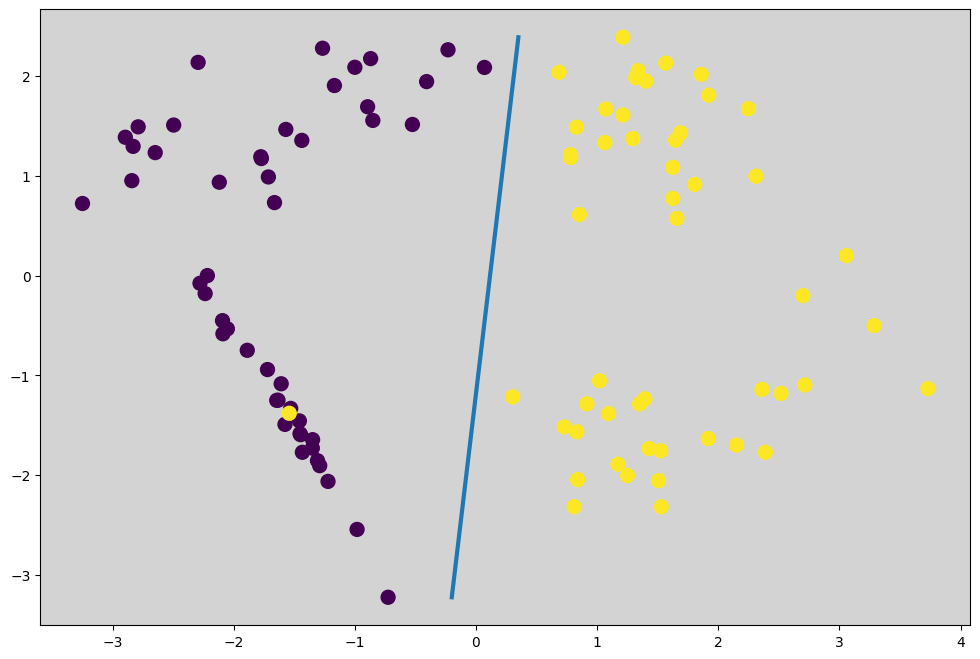

In [19]:
np.random.seed(5)
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, class_sep=1.5)
plt.axes().set_facecolor("lightgray")
plt.scatter(X[:, 0], X[:, 1], s = 100, c=y)

# reasonable guess to a decision bounday
plt.plot([-.2, .35], [X[:,1].min(), X[:, 1].max()], lw=3)
plt.show()

To formalize this idea for the SVM algorithm to the non-separable case, we introduce a 
so called *slack variable* to handle the misclassified examples.  The resulting algorithm is known as a  *soft-margin SVM*.  

With the slack variable, the modified optimization problem becomes

$$\min_{\beta} \frac{1}{\gamma(\beta)} + C\sum_i^N\zeta_n$$

subject to
$$y_i(x_i\cdot\beta) \geq 1 - \zeta_i, \quad\forall\quad i = 1, \ldots, N$$.

This implies that  we want to jointly maximize the  "margin" and minimize the sum of the slack terms for our optimial decision boundary in this case.

$C$ is basically a regularization parameter, very similiar to $\alpha$ in the `Ridge` regression with one difference, can you spot it?

## Dual Formulation for SVM

The resulting optimization algorithm  is beyond the scope of this lecture, but the major result is that this constrained optimization problem is equivalent to an  unconstrained problem minimizing only the hinge loss function! 

A good motivation for this dual formulation is available [here](https://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf).

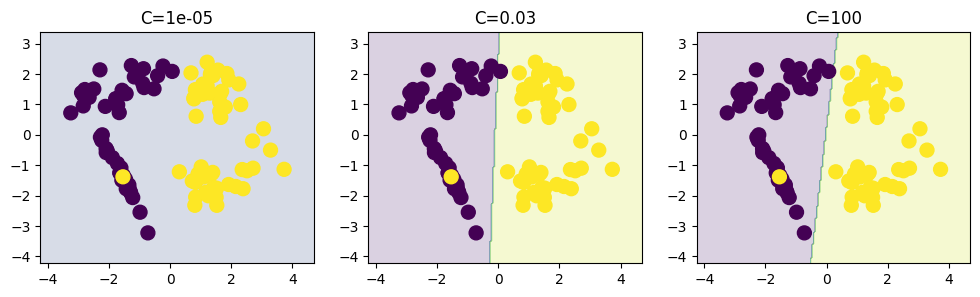

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3)) # show different C
for i, C in enumerate([0.00001, 0.03, 100]):
    svm = SVC(kernel='linear', C=C).fit(X, y)
    plt.sca(fig.axes[i])
    plot_decision(X, y, svm)
    plt.title(f"C={C}")

### Support vectors

Since this algorithm is called support vector machines, a natural question would be "what is a support vector?"

Support vectors are in some sense the points which define the decision boundary.  

- They  lie closest to the decision surface (or hyperplane)  OR points which require slack
- They are the data points most difficult to classify
- They are the data points that directly define on the optimum location of the decision boudary

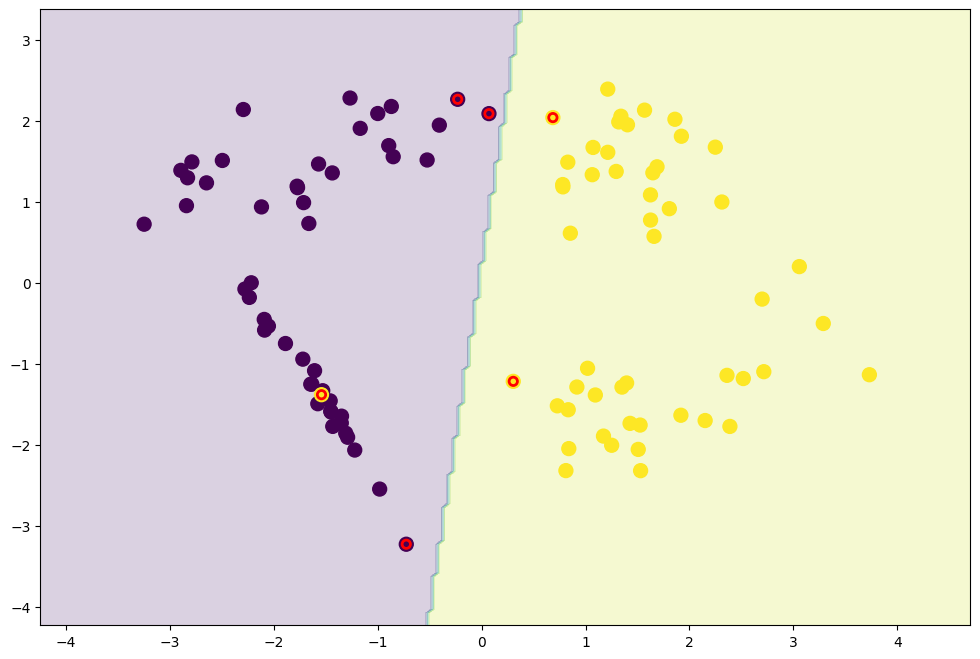

In [12]:
plot_decision(X, y, svm)
plt.scatter(*svm.support_vectors_.T, edgecolor='r', lw = 2, color='None')
plt.show()

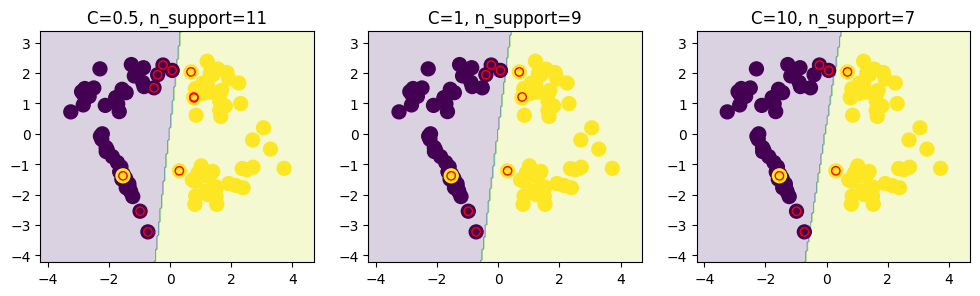

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3)) # show different C
for i, C in enumerate([.5, 1, 10]):
    svm = SVC(kernel='linear', C=C).fit(X, y)
    plt.sca(fig.axes[i])
    plot_decision(X, y, svm)
    plt.scatter(*svm.support_vectors_.T, edgecolor='r', color='None')
    plt.title(f"C={C}, n_support={len(svm.support_vectors_)}")

## Nonlinear decision boundaries

So far we have only been able to fit linear decision boundaries. However, many real-world problems require nonlinear decision boundaries.  

In some cases, new features that are products of the existing features can be used, and linear decision boundaries can be constructed in this higher-dimensional space.


For exampe,  with the feature vector ${\bf x}=(x_1, x_2, \dots, x_n)$, consider the  quadratic transformation

$$\phi({\bf x})=(1, 2x_1, 2x_2, \dots, 2x_n, x_1^2, x_1x_2, \dots x_1x_n, x_2x_1, x_2^2, x_2x_3,\dots,x_2x_n,\dots x_nx_1,x_nx_2,\dots x_n^2)$$

A linear decision boundary in this higher-order feature space may be pssible, but 

- computational cost for the optimization problem increases rapidly 
-  storage cost for the feature matrix increases rapidly
- the addition of a large number of new features can lead to  overfitting

### Kernel Trick

The key insight of so-called "kernel trick" is that computations involving kernel dot-products in the optimization algorithm can be done in the higher-order feature space without explicitly forming or storing the new features.

For example

$$\phi({\bf x})\cdot \phi({\bf z}) = 1 + 2\sum_nx_nz_n + \sum_n\sum_mx_nx_mz_nz_m \\= 1 + 2{\bf x}\cdot {\bf z} + ({\bf x}\cdot {\bf z})^2 \\= (1 + {\bf x}\cdot {\bf z})^2$$

Therefore, to perform the kernel dot-product, we never need to actually compute $\phi(x)$, but rather we just need to compute the  dot products in the low-dimensional space of the original examples!

Lets see an example using the kernels in a perceptron algorithm.

Our goal is to remove dependence on computing $\phi$, i.e. to use a kernel trick.

In [21]:
# psuedocode
def perceptron_train(data, max_iter):
    w = 0
    b = 0
    for i in range(max_iter):
        for x, y in data: 
            a = w * phi(x) + b
            if y * a <= 0:
                w = w + y * phi(x)
                b = b + y
    return w, b

We can notice that at any point in the perceptron algorithm, the weight vector is always a linear combination of the training data examples $\phi(x_n)$, that is 

$$ w = \sum_n \alpha_n \phi(x_n)$$

where $\alpha_n$ is some set of parameters.  

This leads to the so called *Representer theorem*


Consider the separating hyperplane given by $w\cdot\phi(x) + b$.


$$w\cdot\phi(x) + b = \left(\sum_n \alpha_n \phi(x_n)\right)\cdot \phi(x) + b\\
= \sum_n \alpha_n [\phi(x_n)\cdot\phi(x)] + b$$

Therefore the perceptron  algorithm can be rewritten as

In [22]:
# psuedocode
def perceptron_train_kernelized(data, max_iter):
    alpha = [0] * len(data)
    b = 0
    for i in range(max_iter):
        for x, y in data:
            a = sum(alpha[i] * (phi(x[i]).dot(phi(x)))) + b
            if y * a <= 0:
                alpha[i] = alpha[i] + y
                b = b + y
    return w, b

The dot product involving $\phi(x)$ can be carried out using the kernel trick!

# Kernels

A *kernel* is basically general version of the function $\phi(x)\cdot\phi(z)$ which can be denoted $K^\theta(x, z)$ where $\theta$ denotes the kernel parameters.  

- The training algorithms should be formulated such that they only depend on the kernel dot products. 
- Nonlinear separating hyperplanes in the original feature space can be learnt by applying the kernel trick and finding linear separating hyperplanes in the higher-dimensonal kernelized feature space. 


## Properties of Kernel functions

From Mercer's condition, a kernel $K: X \times X \to \mathbb{R}$ must be positive semi-definite, however, the full mathematics its beyond the scope of this lecture.  

Some kernels you will encounter in practise in ML applications are

- polynomical kernels $(1 + x^Tz)^d$
- RBF (gaussian) kernel $K_\gamma(x,z)=e^{-\gamma||x-z||^2}$
- tanh kernels $K(x,z)=tanh(1+x\cdot z)$

*Warning* - technically not a kernel, but in practice works well.

## SVM with Kernels

Now we can apply the kernel trick to the algorithm for the soft-margin SVM.  

This approach is based on  `dual problem` to the optimization defined by the maximum margin classifier. 

$$\alpha_{\text{opt}} = \arg\min_\alpha \frac{1}{2}\sum_i\sum_j\alpha_i\alpha_j y_iy_jK(x_i,x_j) - \sum_i\alpha_i$$

subject to $0\leq \alpha_i \leq C$.


The second term $-\sum_i\alpha_i$ means that $\alpha_i$ can grow as large as it can up to its bound $C$.

For the first term, lets understand $K$ as a type of similarity.  $K$ can either be small or if not, we have two cases

- $y_i = y_j$, in this case $\alpha_i\alpha_j$ is small
- $y_i != y_j$, in this case $\alpha_i , \alpha_j$ are large as possible.  So if two examples are close in feature space, but give differnt results, their corresponding  $\alpha$ will become more important.  

Effectively, the close examples in feature space with different labels are important as they are likely to be near the decision boundary.  

The magnitude of the  $\alpha$ in this way to define the support vectors!

Finally, we apply  the kernelized SVM with radial basis function kernels it to our simple case and look at the new decision boundary.

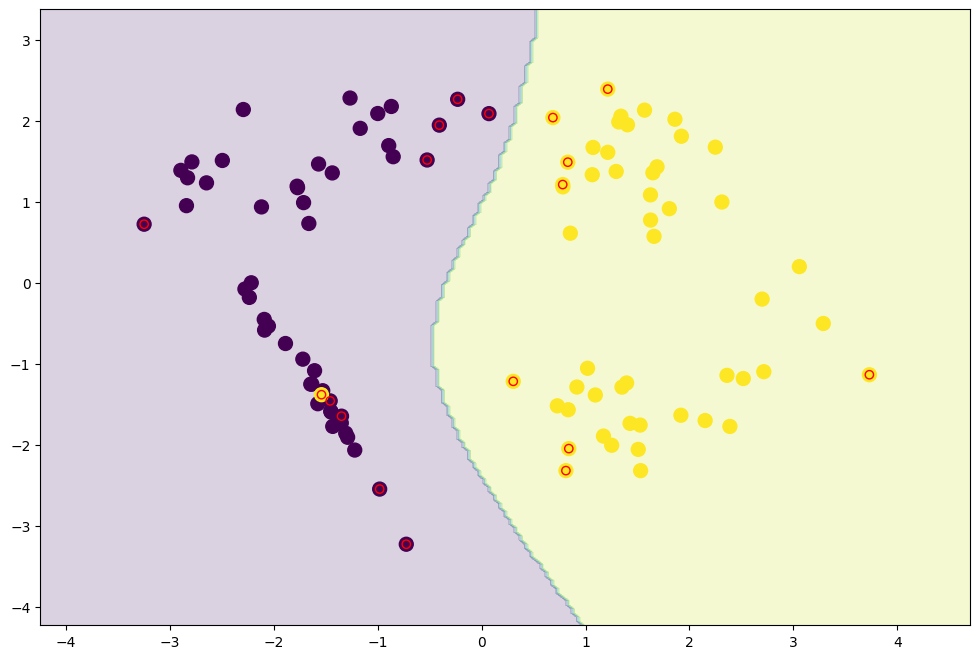

In [19]:
svm = SVC(kernel='rbf').fit(X, y)
plot_decision(X, y, svm)
plt.scatter(*svm.support_vectors_.T, edgecolor='r', color='None')

plt.show()

Note the location of the support vectors has changed from the non-kernelized case -  these support vectors are NOT always close to the decision boundary in the original feature space.

# Summary

- SVM's require input features to be scaled and normalized (use pipelines)
- SVM's can be very computationally expensive (aside from linear svm). For large datasets, the  complexity can be $O(n_{features} \times n_{samples}^2)$
- $C$ and $\gamma$ (if using RBF) are very important hyperparamets and should be carefully tuned, e.g. via cross validation. 